# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [33]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
# load data
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
test = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv")
full_data = [train, test]
titanic = copy.deepcopy(train) 
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [35]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [36]:
# TODO
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [37]:
# TODO
for dataset in full_data:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Cabin'] = dataset['Cabin'].fillna('other')


In [38]:
train['Embarked'].value_counts()
#Mode is the value with the highest frequency. Therefore mode of this column is 'S'


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
train['Embarked'] = train['Embarked'].fillna('S')

In [40]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
test.isna().sum().sort_values(ascending=False)

Fare           1
Embarked       0
Cabin          0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

In [42]:
#Imputing the fare for test data
test['Fare'] = test['Fare'].fillna(dataset['Fare'].mean())


In [43]:
test.isna().sum().sort_values(ascending=False)

Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [44]:
# TODO
train_sorted = train.sort_values('Fare',ascending=False)

train_sorted['index'] = range(len(train_sorted))

train_sorted.loc[train_sorted['index']==15,['Name','Fare']]


,Name,Fare
527,"Farthing, Mr. John",221.7792


### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [45]:
# TODO
titanic_sorted_females = train_sorted.loc[(train_sorted['Sex']=='female') & (train_sorted['Survived'] == 1) ,['Name','Fare']]

titanic_sorted_females.iloc[5,:]

Name    Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Fare                                            247.521
Name: 299, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [46]:
# TODO
train_sorted.pivot_table('Survived',index='Sex',columns='Pclass')


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Findings 

The survival rate for females was higher than that of men.
First class females survived with near certainty.
One in ten third-class men survived.
Third-class females survived with 50% certainty.

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

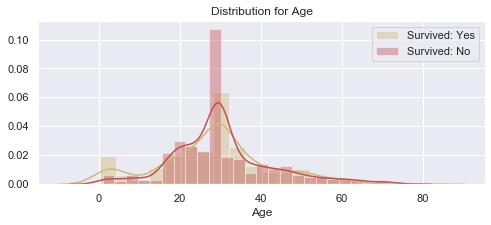

In [47]:
# TODO
def distplot(feature, frame):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'y', label='Survived: Yes')
    ax1 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No')
    plt.legend()
    plt.show()
    
distplot('Age', train)


There are more survivors under the age of 15 and then suddenly more passengers died on around age 15 to 35.After age 35,number of survivors and no. of deathswere pretty much same. Lastly,after around the age of 60, there were hardly any survivors.

/Users/surbhikabra/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/surbhikabra/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


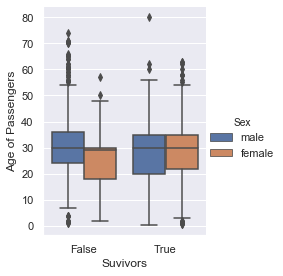

In [48]:
# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=train, kind="box", size=4, aspect=.8)
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)

The average age of the people who survived or not survived in approximately similar.Also, we cannot
find any pattern of survival considering age. So age might not be a very important factor is determining one's chance
of survival.

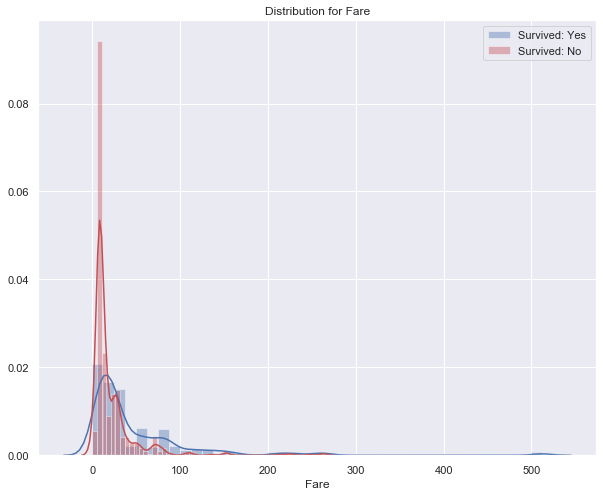

In [49]:
def distplot(feature, frame):
    plt.figure(figsize=(10,8))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'b', label='Survived: Yes')
    ax1 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No')
    plt.legend()
    plt.show()
distplot('Fare', train)


Passengers with lower fare prices had lower chances of survival. So probably, fare is an important factor to 
predict one's chance of survival.


### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [50]:
train.pivot_table("Survived",index="Parch")

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


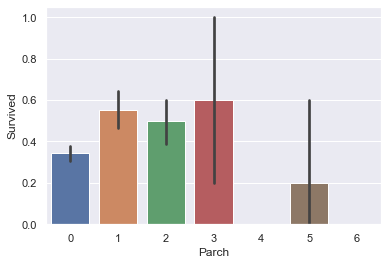

In [51]:
sns.barplot(x='Parch', y= "Survived", data=train)

In [52]:
train.pivot_table("Survived",index="SibSp")

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


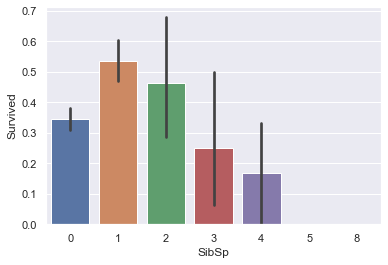

In [53]:
sns.barplot(x='SibSp', y= "Survived", data=train)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [54]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,other,S


### Data Pre-Processing

1.We need to convert a lot of columns to numeric types so that we can find corrleation between the features
and also feed it into a machine learning model. 
2.According to me, columns like PassengerId, Ticket , Name doo not contribute to the high survival rate of the passengers and can be dropped from the dataset.

As Ticket has 681 unique values, it will be tricky to convert it into something useful. 
So I will drop it from the dataset.

In [55]:
for dataset in full_data:
    dataset = dataset.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [56]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,other,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,other,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,other,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,other,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,other,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [57]:
#One hot-encode Sex Column and Embark Column
ports = {"S": 0, "C": 1, "Q": 2}
genders = {"male": 0, "female": 1}
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [58]:
#Convert Age into Bins for better analysis.
for dataset in full_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [59]:
 pd.qcut(train['Fare'], q=6)

0        (-0.001, 7.775]
1      (52.369, 512.329]
2         (7.775, 8.662]
3      (52.369, 512.329]
4         (7.775, 8.662]
             ...        
886      (8.662, 14.454]
887       (26.0, 52.369]
888       (14.454, 26.0]
889       (26.0, 52.369]
890      (-0.001, 7.775]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.775] < (7.775, 8.662] < (8.662, 14.454] < (14.454, 26.0] < (26.0, 52.369] < (52.369, 512.329]]

In [60]:
#Create bins for Fare column as well
for dataset in full_data:
    dataset.loc[(dataset['Fare'] > -0.001) & (dataset['Fare'] <= 7.775) ,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662) ,'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454) ,'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) &( dataset['Fare'] <= 26.0 ),'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369 ),'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 52.369 )& (dataset['Fare'] <= 512.329) ,'Fare'] = 5


In [61]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,2,1,0,0.0,other,0
1,1,1,1,5,1,0,5.0,C85,1
2,1,3,1,3,0,0,1.0,other,0
3,1,1,1,5,1,0,5.0,C123,0
4,0,3,0,5,0,0,1.0,other,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064091,-0.035322,0.081629,0.091691,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.293455,0.083081,0.018443,-0.130339,0.045702
Sex,0.543351,-0.131900,1.000000,-0.085103,0.114631,0.245489,0.012189,0.116569
Age,-0.064091,-0.293455,-0.085103,1.000000,-0.238989,-0.200712,0.050575,0.023064
SibSp,-0.035322,0.083081,0.114631,-0.238989,1.000000,0.414838,-0.006514,-0.059961
Parch,0.081629,0.018443,0.245489,-0.200712,0.414838,1.000000,0.017524,-0.078665
Fare,0.091691,-0.130339,0.012189,0.050575,-0.006514,0.017524,1.000000,0.052937
Embarked,0.106811,0.045702,0.116569,0.023064,-0.059961,-0.078665,0.052937,1.000000


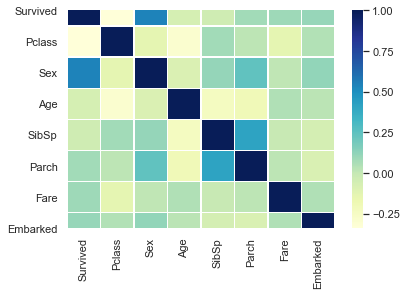

In [62]:
# TODO
corr = train.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

### Insights

1. There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived.
2. There is a negative coorelation between Fare and Pclass, Age and Plcass
3. Parch and SibSp are highly correlated and can be used in combination to test its overall effect on the model.
4. There is a high positive correlation between Sex and Survived.

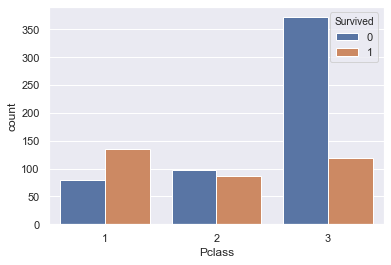

In [63]:
sns.countplot(x='Pclass', hue="Survived", data=train)
plt.show()

Passengers in Class 1 and Class 2 had high chances of survival.
Since Fare and Pclass have negative correlation, we can clearly say upper class(rich) people had more chances
of survival than the lower / middle class people.

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [64]:
# TODO
import copy
data= copy.deepcopy(train)
y=data['Survived']
X=data.drop(["Survived","Cabin"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [66]:
display(acc_log)

80.2

In [72]:
test=test.drop(["Cabin"],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,5,0,0,1.0,2
1,3,1,6,1,0,0.0,0
2,2,0,6,0,0,2.0,2
3,3,0,3,0,0,2.0,0
4,3,1,2,1,1,2.0,0


In [73]:
prediction = logreg.predict(np.array(test))

In [74]:
Results  = pd.DataFrame(np.array(prediction),columns=['Survived'])

In [77]:
test_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv")

In [86]:
Final_Results = pd.concat([test_data['PassengerId'].to_frame(),Results])

In [88]:
Final_Results.to_csv("mysubmissions.csv")

## Ways to Improve the model

Adding following columns to the model:
1.FamilyCount : To keep track of total family members of the passengers.
2.IsAlone : To check if the passenger is alone or acconpamied by someone.

We can then check if it is contriburting to the model or not.

In [89]:
for dataset in full_data:
    dataset['FamilyCount']=dataset.SibSp+data.Parch

In [90]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilyCount'] == 1, 'IsAlone'] = 1

In [91]:
print (train[['FamilyCount', 'Survived']].groupby(['FamilyCount'], as_index=False).mean())

   FamilyCount  Survived
0            0  0.303538
1            1  0.552795
2            2  0.578431
3            3  0.724138
4            4  0.200000
5            5  0.136364
6            6  0.333333
7            7  0.000000
8           10  0.000000


Chance of Survival is highest when the number of family members is 3. Impact of this feature looks good.

In [92]:
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.346575
1        1  0.552795


Impact on Survival rate is considerable.

In [93]:
y=train['Survived']
X=train.drop(["Survived","Cabin","SibSp","Parch"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilyCount,IsAlone
6,1,0,6,4.0,0,0,0
718,3,0,4,3.0,2,0,0
685,2,0,3,4.0,1,3,0
73,3,0,3,3.0,1,1,1
882,3,1,2,2.0,0,0,0
...,...,...,...,...,...,...,...
106,3,1,2,0.0,0,0,0
270,1,0,4,4.0,0,0,0
860,3,0,6,2.0,0,2,0
435,1,1,1,5.0,0,3,0


In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [98]:
display(acc_log)

80.37

The accuracy of the model improves after adding the two features.